# Aprendizaje No Supervisado

In [1]:
import pandas as pd

total_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/k-means-project-tutorial/main/housing.csv")
total_data

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [2]:
columnas_necesarias = ['Latitude', 'Longitude', 'MedInc']
data_necesario = total_data[columnas_necesarias]
data_necesario

,Latitude,Longitude,MedInc
0,37.88,-122.23,8.3252
1,37.86,-122.22,8.3014
2,37.85,-122.24,7.2574
3,37.85,-122.25,5.6431
4,37.85,-122.25,3.8462
...,...,...,...
20635,39.48,-121.09,1.5603
20636,39.49,-121.21,2.5568
20637,39.43,-121.22,1.7000
20638,39.43,-121.32,1.8672


/tmp/ipykernel_1877/3928024901.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_necesario['cluster'] = kmeans.fit_predict(data_necesario)


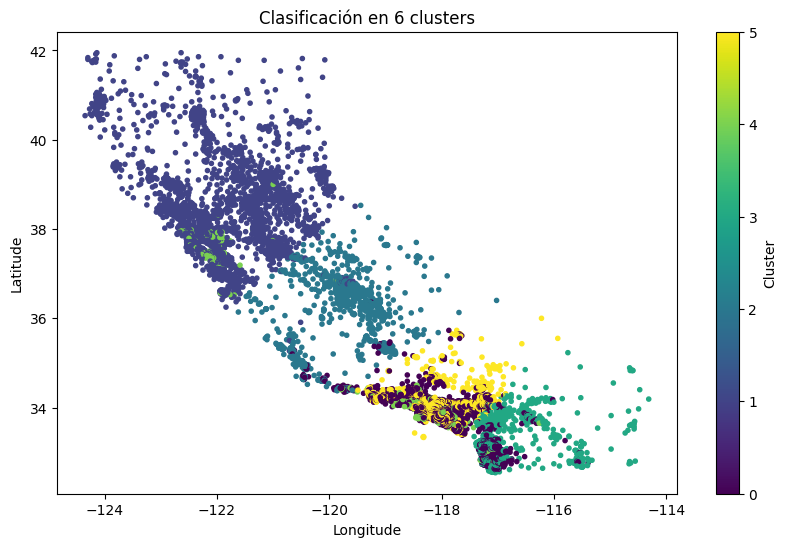

Número de casas en cada cluster:
cluster
0    4165
1    7586
2    1676
3    1500
4     592
5    5121
Name: count, dtype: int64


In [4]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

kmeans = KMeans(n_clusters=6, random_state=42)
data_necesario['cluster'] = kmeans.fit_predict(data_necesario)

plt.figure(figsize=(10, 6))
plt.scatter(data_necesario['Longitude'], data_necesario['Latitude'], c=data_necesario['cluster'], cmap='viridis', marker='.')
plt.title('Clasificación en 6 clusters')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar(label='Cluster')
plt.show()

cluster_counts = data_necesario['cluster'].value_counts().sort_index()
print("Número de casas en cada cluster:")
print(cluster_counts)



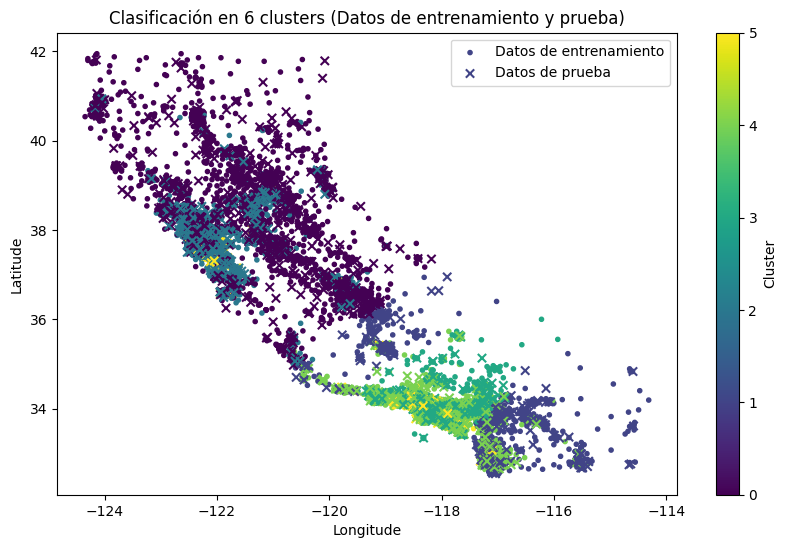

In [5]:
from sklearn.model_selection import train_test_split

# Dividir los datos en entrenamiento y prueba
X_train, X_test = train_test_split(data_necesario, test_size=0.2, random_state=42)

# Entrenar el modelo K-Means con los datos de entrenamiento
kmeans_test = KMeans(n_clusters=6, random_state=42)
X_train['cluster'] = kmeans_test.fit_predict(X_train)

# Predecir los clusters para los datos de prueba
X_test['cluster'] = kmeans_test.predict(X_test)

# Graficar los clusters en un diagrama de puntos junto con los datos de prueba
plt.figure(figsize=(10, 6))
plt.scatter(X_train['Longitude'], X_train['Latitude'], c=X_train['cluster'], cmap='viridis', marker='.', label='Datos de entrenamiento')
plt.scatter(X_test['Longitude'], X_test['Latitude'], c=X_test['cluster'], cmap='viridis', marker='x', label='Datos de prueba')
plt.title('Clasificación en 6 clusters (Datos de entrenamiento y prueba)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar(label='Cluster')
plt.legend()
plt.show()


In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Entrenar un modelo de Regresión Logística utilizando las etiquetas de clusters como características
X_train_logistic = X_train.drop(columns=['cluster']) 
y_train_logistic = X_train['cluster']  

logistic_model = LogisticRegression(max_iter=1000, random_state=42)
logistic_model.fit(X_train_logistic, y_train_logistic)

# Obtener predicciones para los datos de entrenamiento y prueba
train_predictions = logistic_model.predict(X_train_logistic)
test_predictions = logistic_model.predict(X_test.drop(columns=['cluster']))

# Obtener estadísticas del modelo
train_report = classification_report(y_train_logistic, train_predictions)
test_report = classification_report(X_test['cluster'], test_predictions)

print("Estadísticas del modelo de Regresión Logística para datos de entrenamiento:")
print(train_report)
print("Estadísticas del modelo de Regresión Logística para datos de prueba:")
print(test_report)




Estadísticas del modelo de Regresión Logística para datos de entrenamiento:
              precision    recall  f1-score   support

           0       0.95      0.96      0.95      4466
           1       1.00      0.14      0.25      1622
           2       0.95      0.94      0.94      2527
           3       0.75      0.98      0.85      4050
           4       0.96      0.98      0.97      3367
           5       0.98      0.96      0.97       480

    accuracy                           0.89     16512
   macro avg       0.93      0.83      0.82     16512
weighted avg       0.91      0.89      0.86     16512

Estadísticas del modelo de Regresión Logística para datos de prueba:
              precision    recall  f1-score   support

           0       0.95      0.96      0.96      1126
           1       1.00      0.16      0.27       408
           2       0.94      0.94      0.94       588
           3       0.76      0.98      0.86      1071
           4       0.95      0.98      0.

/home/vscode/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
